# Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, f_oneway

sns.set()

In [5]:
sns.set(context='notebook')

# Reading the data 

In [3]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA
## Shape of the dataframe

In [5]:
df.shape

(1338, 7)

### Datatypes of the variables in the dataframe

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

### Missing values in the dataframe for each column

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

___
#### Observations:
1. Total number of rows = 1338
2. Total  number of columns = 7
2. There are 3 categorical variables present = sex, smoker, region
3. There are 4 numerical variables present = age, bmi, children, charges
4. Null values or missing values present = 0
5. Column 'children' is numerical variable but can be treated as categorical variable based on the insights

### 5 point summary

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


___
#### Observations:
1. Age and bmi is properly distributed across the dataset.
2. Very few customers have children more than 2.
3. Charges column data is highly skewed as there is huge difference between 75th percentile and max value.

### Distribution of columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a33249fd0>,
      dtype=object)

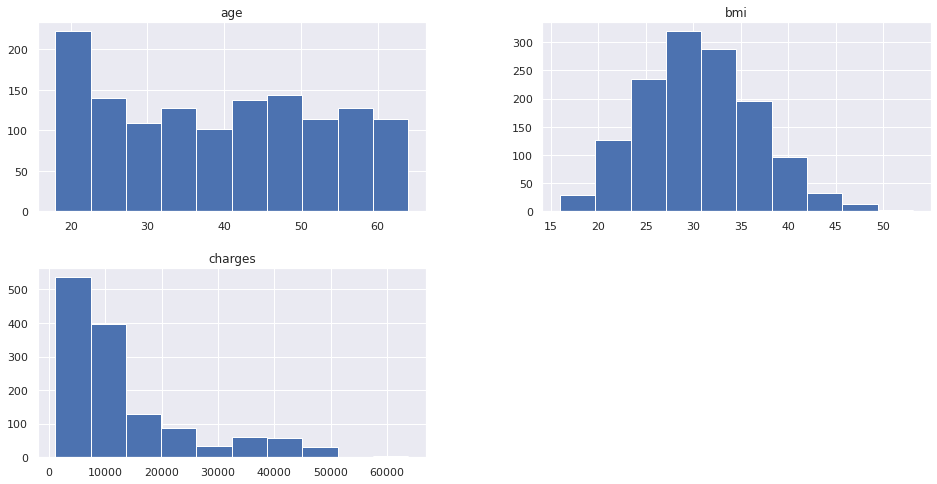

In [10]:
# Histogram plot for bmi, age and charges column without KDE
df[['bmi', 'age', 'charges']].hist(bins=10, figsize=(16, 8))

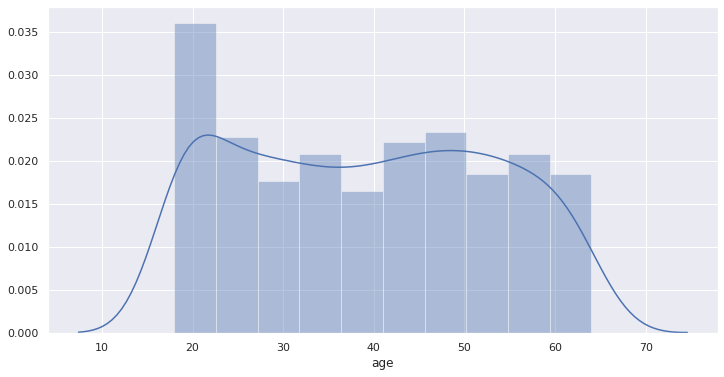

In [7]:
# Dist plot for age column
plt.figure(figsize=(12, 6))
sns.distplot(df['age'], bins=10)

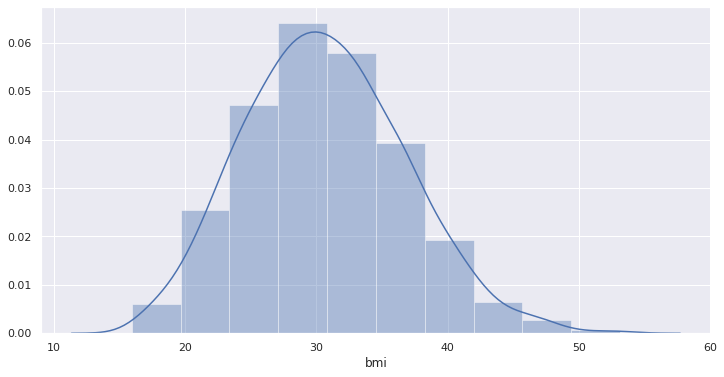

In [12]:
# Dist plot for bmi column
plt.figure(figsize=(12, 6))
sns.distplot(df['bmi'], bins=10)

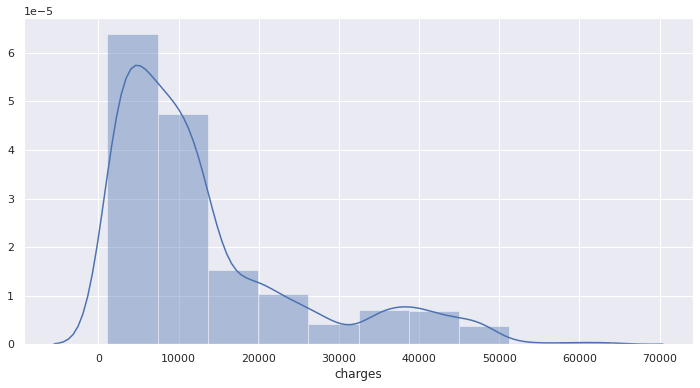

In [13]:
# Dist plot for charges column
plt.figure(figsize=(12, 6))
sns.distplot(df['charges'], bins=10)

### Skewness

In [14]:
# Measure of skewness for bmi, age and charges
bmi_skew = df['bmi'].skew()
age_skew = df['age'].skew()
charges_skew = df['charges'].skew()
print('The measure of skewness of bmi column is', bmi_skew)
print('The measure of skewness of age is', age_skew)
print('The measure of skewness of charges is', charges_skew)

The measure of skewness of bmi column is 0.2840471105987448
The measure of skewness of age is 0.05567251565299186
The measure of skewness of charges is 1.5158796580240388


___
#### Observations:
1. Based on the previous step and measure of skewness, BMI is quiet normally distributed.
2. Age skewness is near to 0 and based on the above plot, it can be concluded that age is quiet uniformly distributed.
3. The charges are right skewed based on the plot and measure of skewness.

### Checking presence the outliers

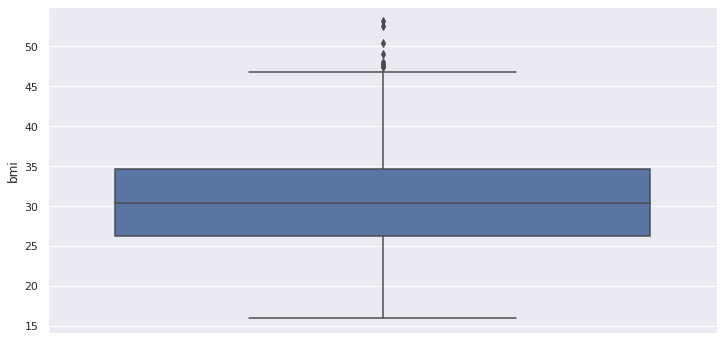

In [15]:
# Box plot for bmi column
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['bmi'])

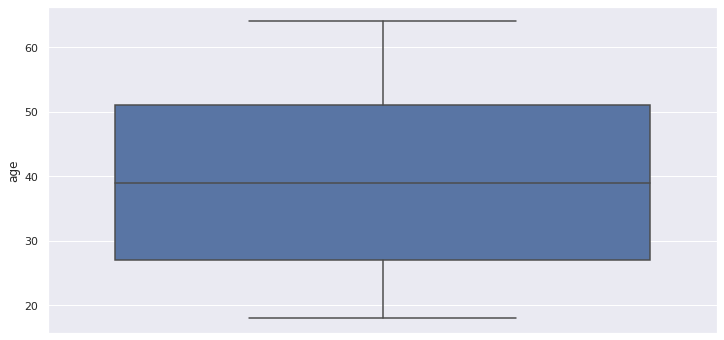

In [16]:
# Box plot for age column
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['age'])

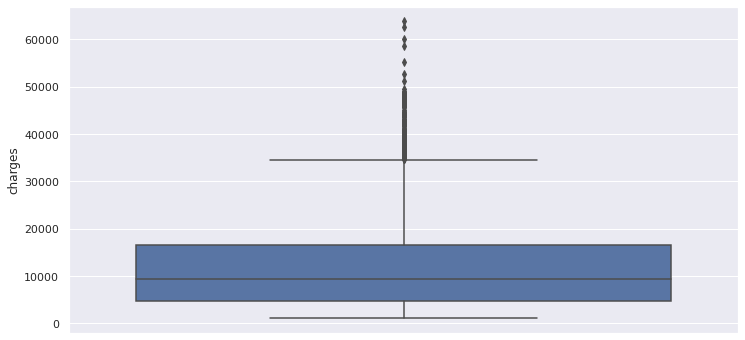

In [17]:
# Box plot for charges column
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['charges'])

___
#### Observations:
1. In bmi column, there are few outliers present.
2. In age column, there are no outliers.
3. In charges column, there are quiet high number of outliers present.

### Distribution of categorical columns

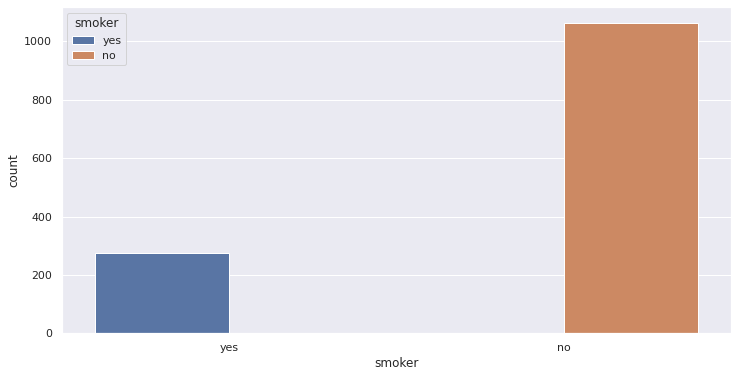

In [18]:
# Bar chart for smoker column
plt.figure(figsize=(12, 6))
sns.countplot(df['smoker'], hue=df['smoker'])

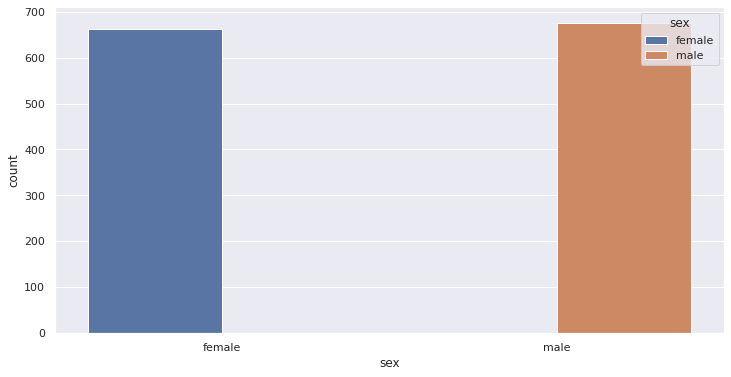

In [19]:
# Bar chart for sex column
plt.figure(figsize=(12, 6))
sns.countplot(df['sex'], hue=df['sex'])

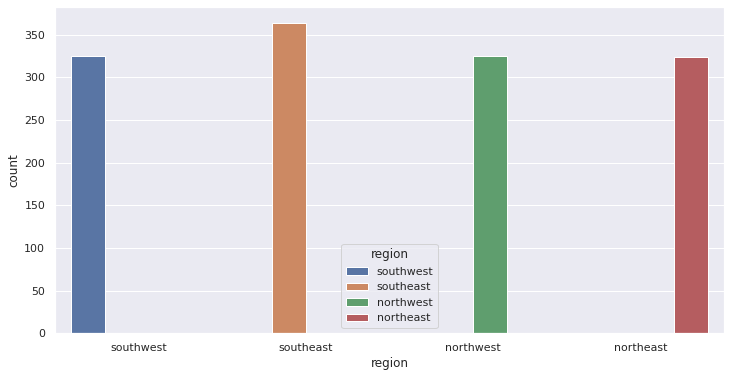

In [20]:
# Bar chart for region column
plt.figure(figsize=(12, 6))
sns.countplot(df['region'], hue=df['region'])

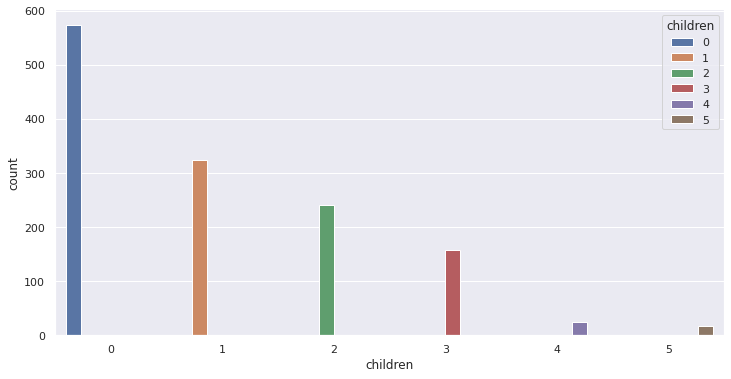

In [21]:
# Bar chart for children column
plt.figure(figsize=(12, 6))
sns.countplot(df['children'],hue=df['children'])

___
#### Observations:
1. Number of non-smokers are more than the number of smokers.
2. Gender wise data distribution is equal.
3. Data is distributed across regions.
4. Most of the customers are having children less than 3. So the data should be treated differently for customers having children less than 3 and equal or more than 3.

#### Bivariate Analysis

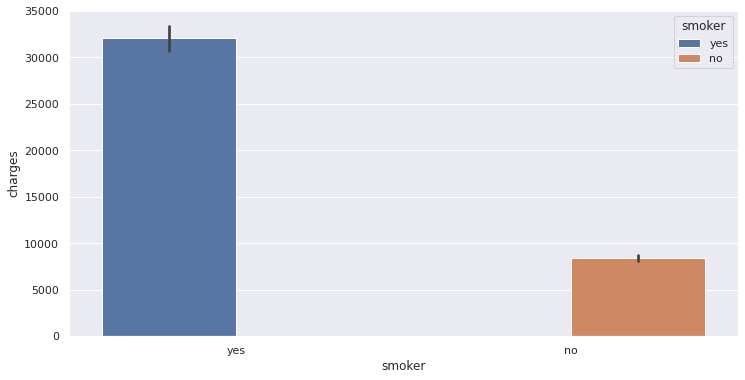

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='smoker', y='charges', data=df, hue=df['smoker'])

#### Observations:
1. The charges for customers who smokes are lot more higher than customers who doesn't smoke.

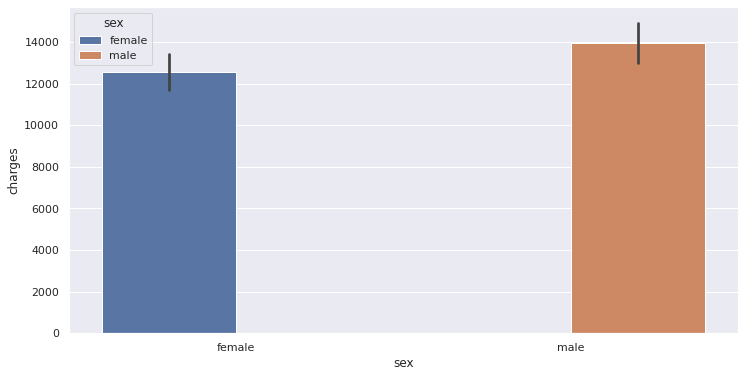

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='charges', data=df, hue=df['sex'])

#### Observations:
1. There is not much difference but male customers have high charges than female customers.

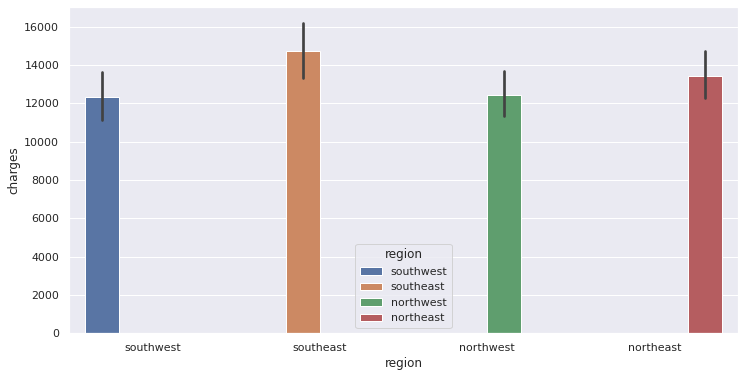

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', data=df, hue=df['region'])

#### Observations:
1. The southeast region customers have highest charges followed by northeast. 
2. Southwest and northwest region customers looks similar in terms charges.

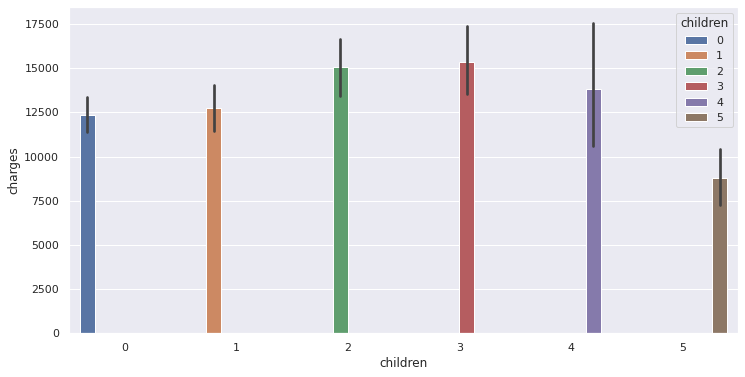

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='children', y='charges', data=df, hue=df['children'])

#### Observations:
1. The customers with 3 children have highest charges following by customer with 2 children.
2. Customers with 5 children have low charges. It is due to customers with 5 children are less present in data.
3. The count for customers with 0 children are highest but charges by same customer can be seen are not highest.

#### Multi-variate Analysis

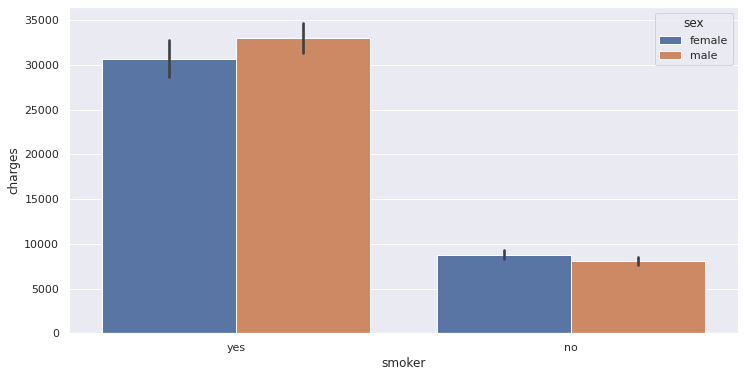

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='smoker', y='charges', data=df, hue=df['sex'])

#### Observations:
1. The charges by male customers are more than the female customer who smokes.
2. On the other hand, it can be seen that charges by female customers are more than the male customers who doesn't smoke.

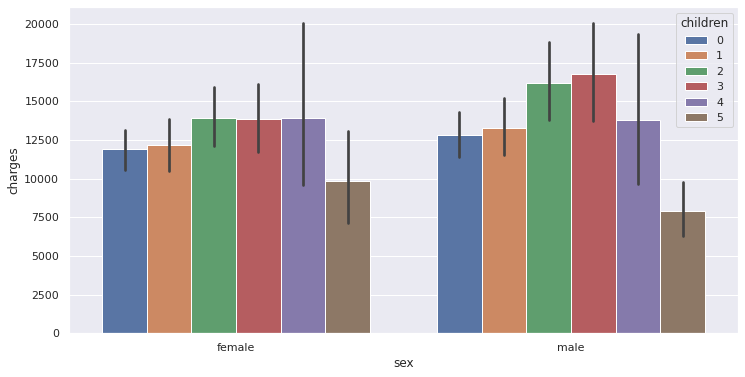

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='charges', data=df, hue=df['children'])

#### Observations:
1. It can be observed that male customers with 3 children have more charges than the female customer with 3 children.
2. Female customers with 2,3 and 4 are alomost equal while there is difference can be observed in male customers with 2,3 and 4 children.
3. In both male and female, there are less charges have be billed by customers having 5 children.

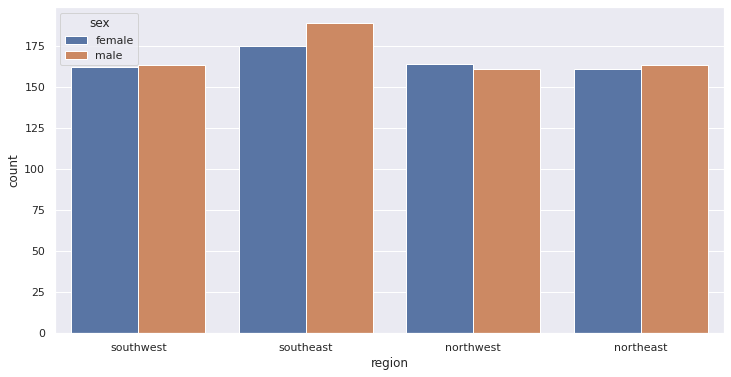

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['region'], hue=df['sex'])

#### Observations:
1. Region is having equally distributed customers based on gender. Region will not have much impact on customer charges as well.

### Pairplot for all columns

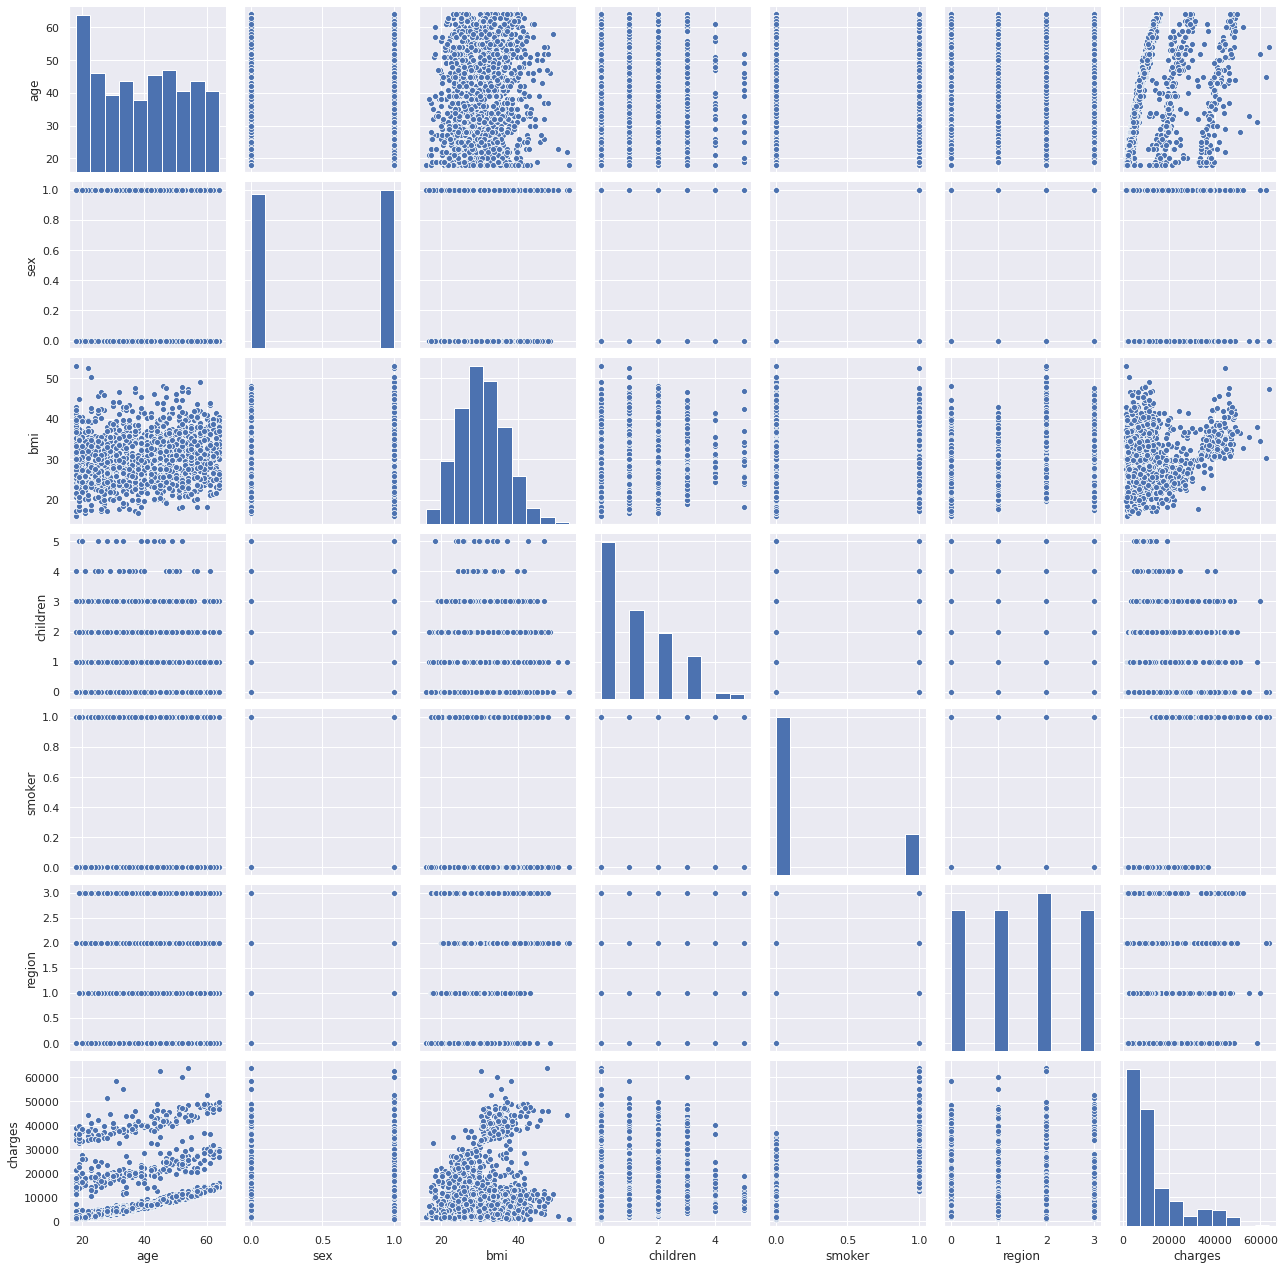

In [29]:
le = LabelEncoder()
df_copy = df.copy(deep=True)
df_copy['sex'] = le.fit_transform(df_copy['sex'])
df_copy['smoker'] = le.fit_transform(df_copy['smoker'])
df_copy['region'] = le.fit_transform(df_copy['region'])
sns.pairplot(df_copy)

___
#### Observations:
1. There is no clear relationship between 'age' and 'charges' neither between 'age' and 'bmi'.
2. The 'charges' can be seen decreasing as value of 'children' increases.
3. Smokers are having high charges than the non-smoker customers.
4. The 'bmi' seems to be decreasing with respect to value of 'children' but there are few extreme values of 'bmi' for children value of 5.

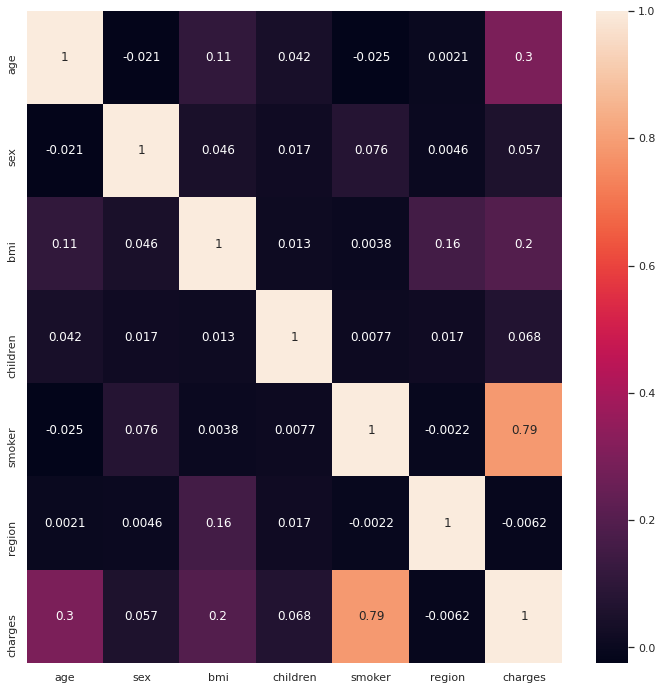

In [30]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_copy.corr(), annot=True)

___
#### Observations:
1. There is high correlation between the smoker and charges.
2. Also it can be observed, charges are slightly affected by age and bmi.
3. There is a slight correlation can be seen between region and bmi.

# Statistical Analysis

### Charges of people who smoke differ significantly from the people who don't

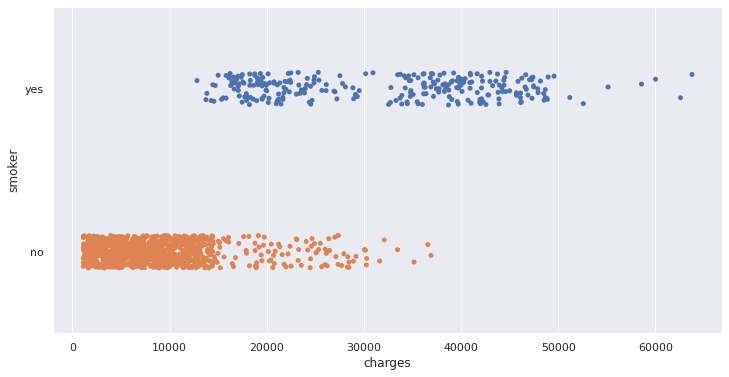

In [31]:
plt.figure(figsize=(12,6))
sns.stripplot(df['charges'], df['smoker'])

#### Observations:
Based on the scatterplot, it can be seen there is difference between the 'charges' for people who smoke and people who don't.

In [32]:
df_smoker = df[df['smoker'] == 'yes']['charges']
df_nonsmoker = df[df['smoker'] == 'no']['charges']

### Hypothesis Testing:
#### Null Hypothesis (Ho) => Charges for smoker and non-smoker are same 
#### Alternate Hypothesis (Ha) => Charges for smoker and non-smoker are different

##### Significance Level: 0.05

In [41]:
t_statistic, p_value = ttest_ind(df_smoker, df_nonsmoker)
print('t_statistic:', t_statistic, ' | p-value:', p_value)

if (p_value < 0.05):
    print('As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the charges for smoker and non smoker are significantly different.')
else:
    print('As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence the charges for smoker and non smoker are not significantly different.')

t_statistic: 46.664921172723716  | p-value: 8.271435842177219e-283
As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the charges for smoker and non smoker are significantly different.


#### As it has been observed that charges is not normally distributed, so Mann Whitney U can be applied for the hypothesis testing.

In [42]:
statistic, p_value = mannwhitneyu(df_smoker, df_nonsmoker)
print('statistic:', statistic, ' | p-value:', p_value)

if (p_value < 0.05):
    print('As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the charges for smoker and non smoker are significantly different.')
else:
    print('As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence the charges for smoker and non smoker are not significantly different.')

statistic: 7403.0  | p-value: 2.6351167222517853e-130
As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the charges for smoker and non smoker are significantly different.


___
### BMI of males differ significantly from that of females

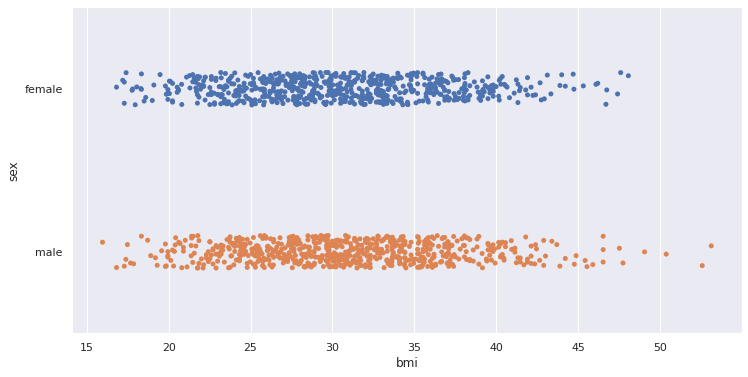

In [34]:
plt.figure(figsize=(12,6))
sns.stripplot(df['bmi'], df['sex'])

#### Observations:
Based on the scatterplot, there is no significant difference for 'bmi' by gender.

In [44]:
df_male = df[df['sex'] == 'male']['bmi']
df_female = df[df['sex'] == 'female']['bmi']

### Hypothesis Testing:
#### Null Hypothesis (Ho) => BMI of males and females doesn't differ significantly 
#### Alternate Hypothesis (Ha) => BMI of males and females differ significantly
##### Significance Level: 0.05

In [45]:
t_statistic, p_value = ttest_ind(df_male, df_female)
print('t-statistic:', t_statistic, ' | p-value:', p_value)

if (p_value < 0.05):
    print('As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence BMI of male and female differ significantly.')
else:
    print('As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence BMI of male and female doesn\'t differ significantly.')

t-statistic: 1.696752635752224  | p-value: 0.08997637178984932
As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence BMI of male and female doesn't differ significantly.


___
### The proportion of smokers significantly different in different genders

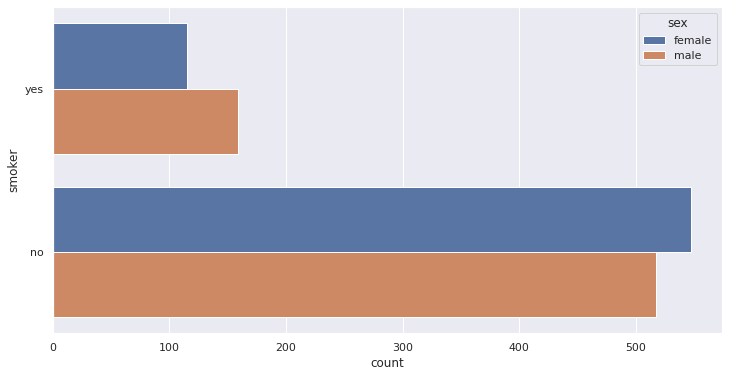

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['smoker'], hue=df['sex'])

#### Observations:
Based on the plot, there is difference between the value smokers across gender.

### Hypothesis testing:
#### Null Hypothesis (Ho) => The proportion of smokers across gender is same
#### Alternate Hypothesis (Ha) => The proportion of smokers across gender is different
##### Significance Level: 0.05

In [48]:
contigency_table = pd.crosstab(df['sex'], df['smoker'])
contigency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [49]:
chi, p_value, dof, expected_value = chi2_contingency(contigency_table)
print('chi2 value:', chi, ' | p-value:', p_value, ' | Degrees of Freedom:', dof, ' | Expected:', expected_value)


if (p_value < 0.05):
    print('As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the proportion of smokers across gender is significantly different.')
else:
    print('As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence the proportion of smokers across is not significantly different.')

chi2 value: 7.39291081459996  | p-value: 0.006548143503580696  | Degrees of Freedom: 1  | Expected: [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence the proportion of smokers across gender is significantly different.


___
### Distribution of bmi across women with no children, one child and two children are the same

In [50]:
df_female = df[df['sex'] == 'female']

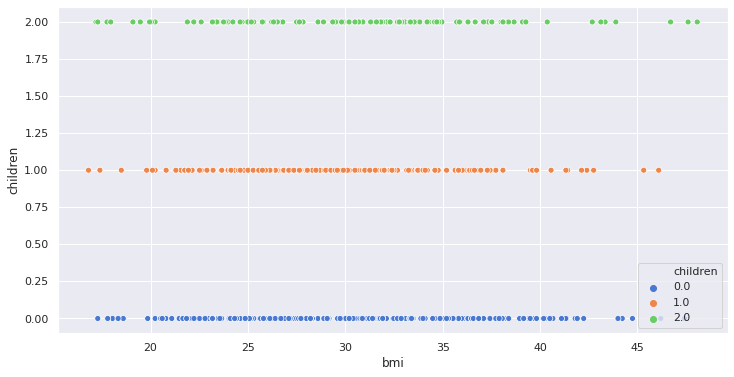

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_female['bmi'], df_female[df_female['children'] < 3]['children'], hue=df_female[df_female['children'] < 3]['children'], palette='muted')

#### Observations:
Based on the plot, the distribution of 'bmi' are nearly same across women with 0, 1 or 2 children.

In [52]:
zero_child = df_female[df_female['children'] == 0]['bmi']
one_child = df_female[df_female['children'] == 1]['bmi']
two_child = df_female[df_female['children'] == 2]['bmi']

### Hypothesis Testing:
#### Null Hypothesis (Ho) => Number of children has no impact on BMI for women
#### Alternate Hypothesis (Ha) => Number of children has significant impact on BMI for women
##### Significance Level: 0.05

In [53]:
f_stat, p_value = f_oneway(zero_child, one_child, two_child)
print('statistic:', f_stat, ' | p-value:', p_value)

if (p_value < 0.05):
    print('As p-value is less than 0.05, therefore reject the Null Hypothesis. Hence number of children has impact on BMI of women.')
else:
    print('As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence number of children has no impact on BMI of women.')

statistic: 0.3344720147757968  | p-value: 0.7158579926754841
As p-value is more than 0.05, therefore cannot reject the Null Hypothesis. Hence number of children has no impact on BMI of women.
